In [1]:
%pip install segment-anything
%pip install wget

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import wget
import torch
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import matplotlib.patches as patches
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

In [3]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

def resize_image(image, max_dimension=200):
    width, height = image.size
    if width > height:
        new_width = max_dimension
        new_height = int(height * (max_dimension / width))
    else:
        new_height = max_dimension
        new_width = int(width * (max_dimension / height))
    image = image.resize((new_width, new_height), Image.LANCZOS)
    return image

def load_sam(model_type, sam_checkpoint, device):
    print("Loading model...")
    sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
    print(f"Shifting model to {device} device...")
    sam.to(device=device)
    return sam

In [4]:
url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
destination_path = "sam-weights/sam_vit_h_4b8939.pth"

if not os.path.exists(destination_path):
    wget.download(url, destination_path)
    print("-- weights downloaded --")
else:
    print("-- weights already downloaded --")

model_type = "vit_h"
sam_checkpoint = "sam-weights/sam_vit_h_4b8939.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sam = load_sam(model_type, sam_checkpoint, device)

-- weights already downloaded --
Loading model...
Shifting model to cuda device...


In [5]:
def get_sam_masks(image, sam_model):
    print("Initiating SAM mask generator...")
    mask_generator = SamAutomaticMaskGenerator(
        model=sam_model,
        points_per_side=32,
        pred_iou_thresh=0.92,
        stability_score_thresh=0.95,
        crop_n_layers=1, # mask prediction will be run again on crops of the image
        crop_n_points_downscale_factor=2,
        min_mask_region_area=50,
    )
    print("Predicting masks...")
    masks = mask_generator.generate(image)
    return masks

def show_anns(anns):
    if len(anns) == 0:
        return
    if 'area' in anns[0]:
        sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    else:
        sorted_anns = anns
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

Processing image...


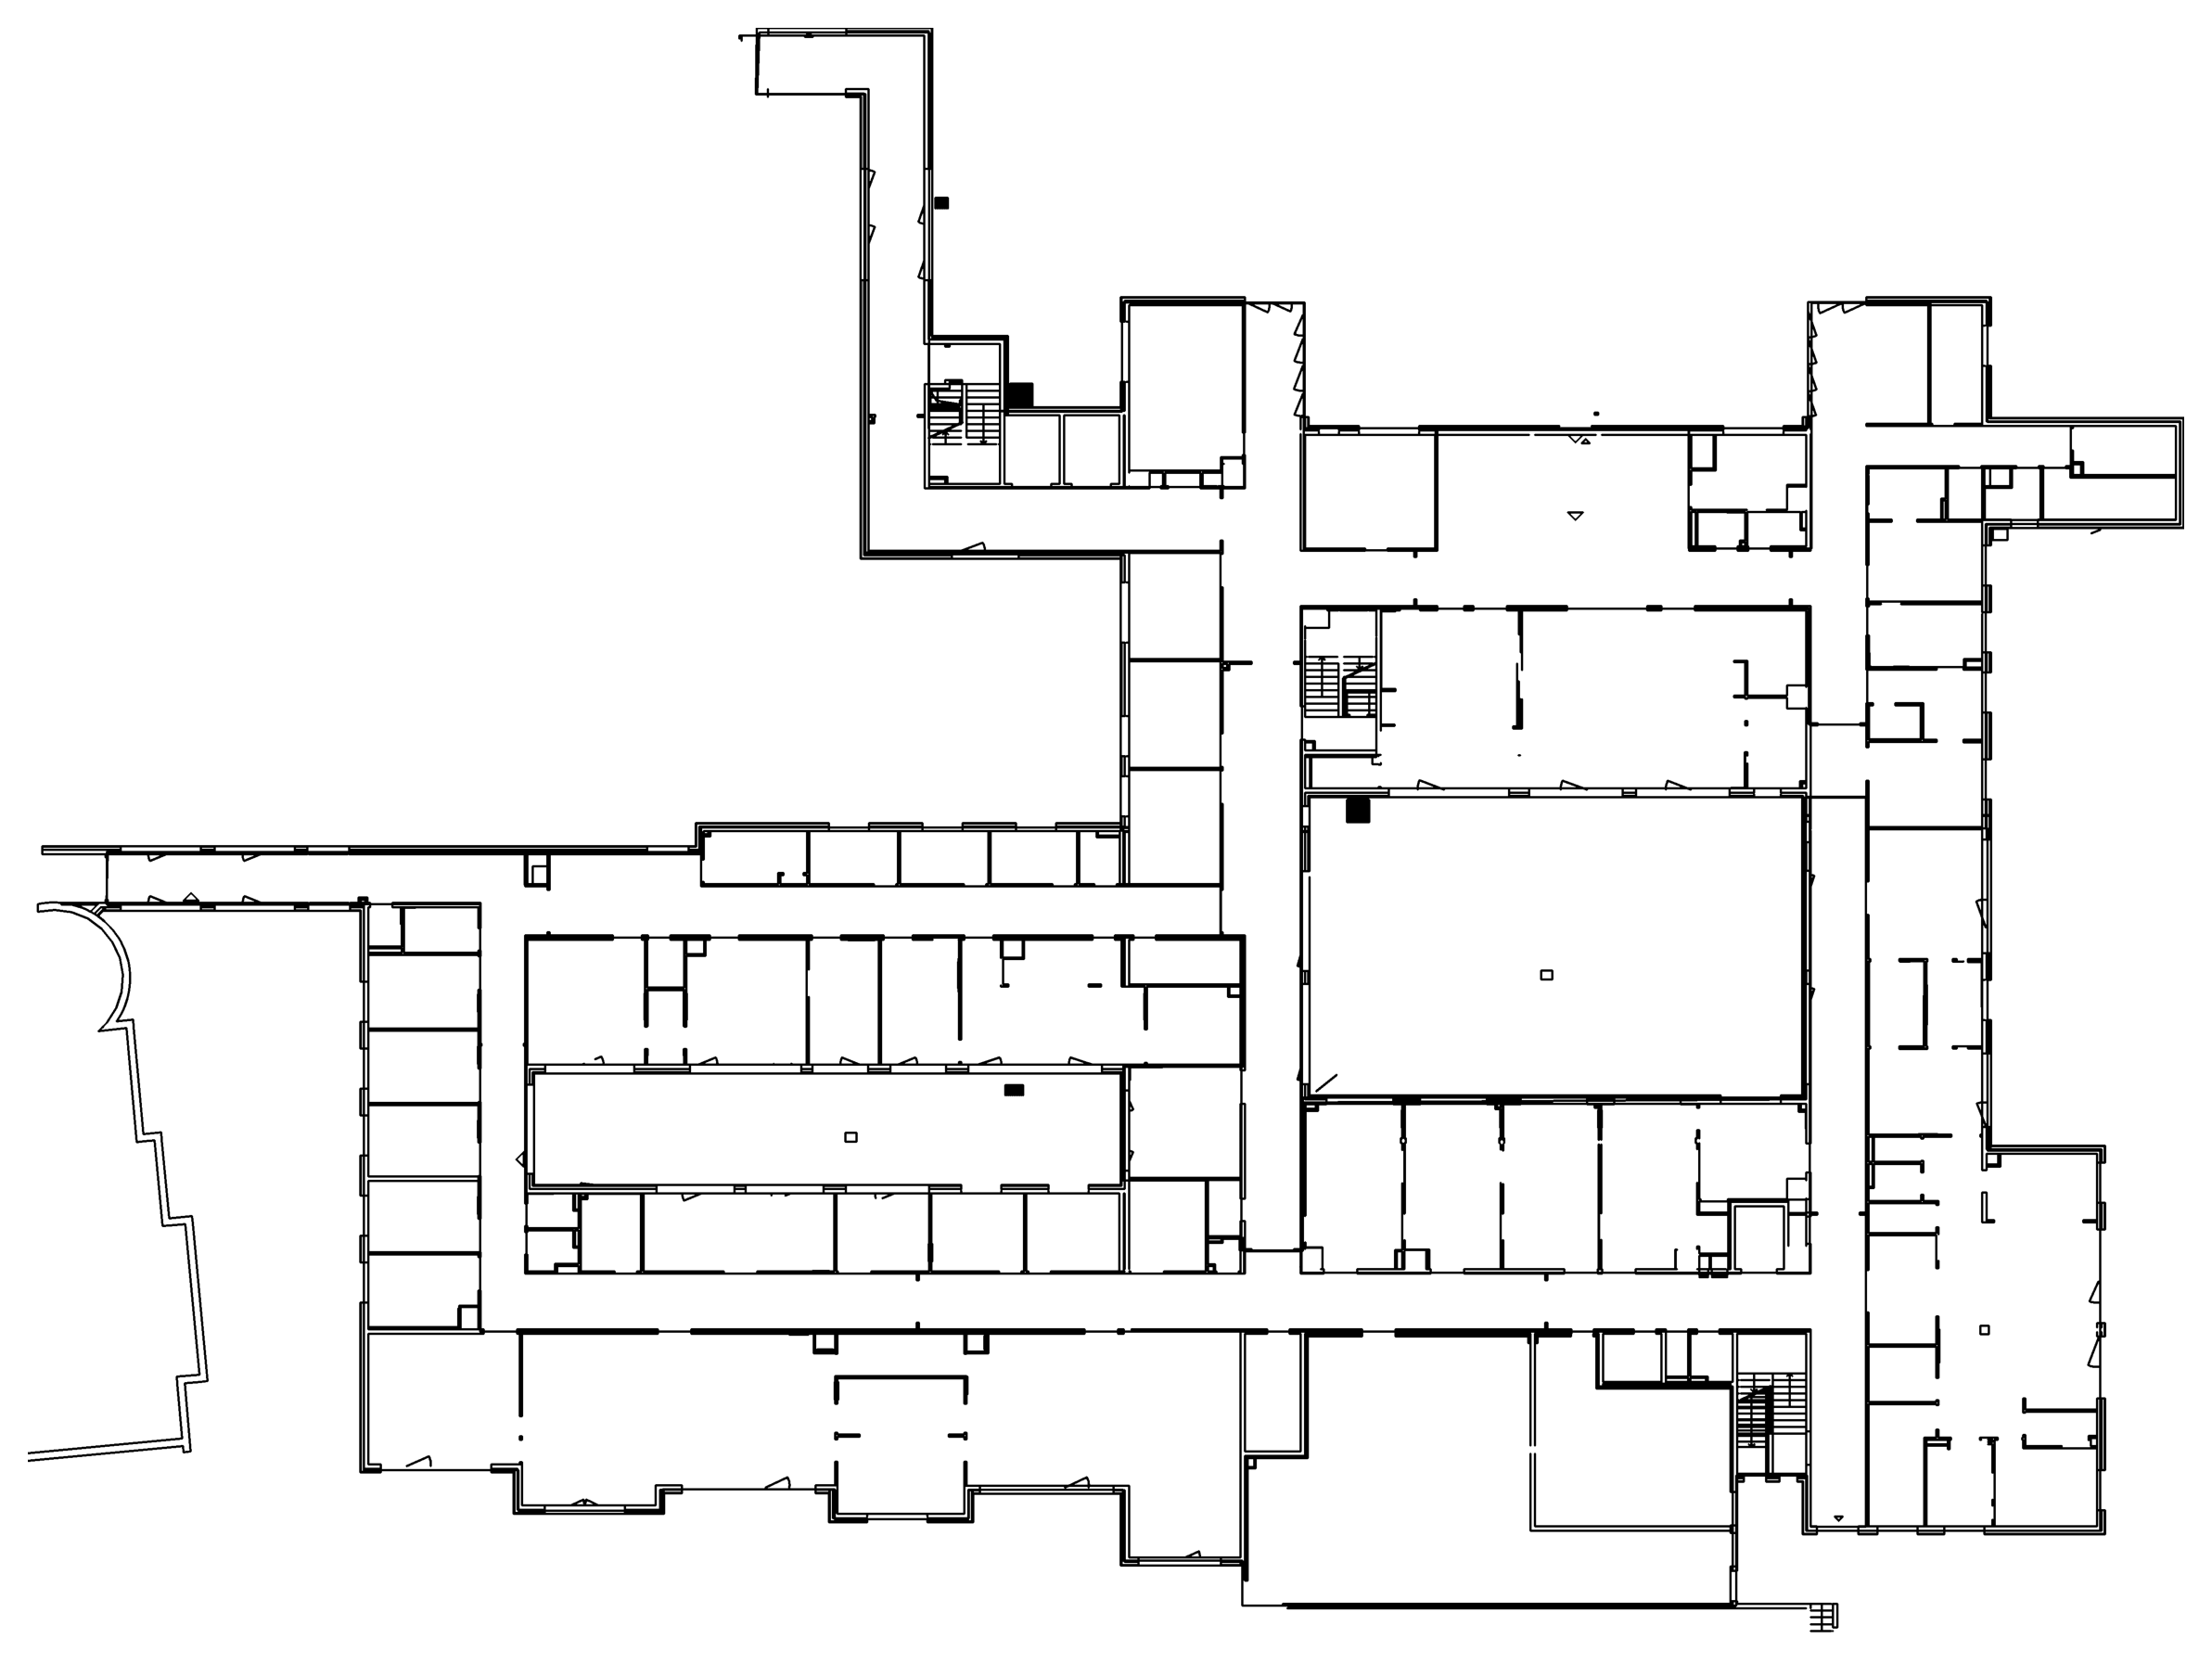

In [ ]:
image_path = "test_images/samples/Output0_binary_image.png"

print("Processing image...")
image = load_image(image_path)
image = np.array(image) # convert to numpy array

# Display Image
plt.figure(figsize=(10,10), dpi=300)
plt.imshow(image)
plt.axis('off')
plt.show()

Extracting SAM masks...
Initiating SAM mask generator...
Predicting masks...
Total segmentation masks: 47


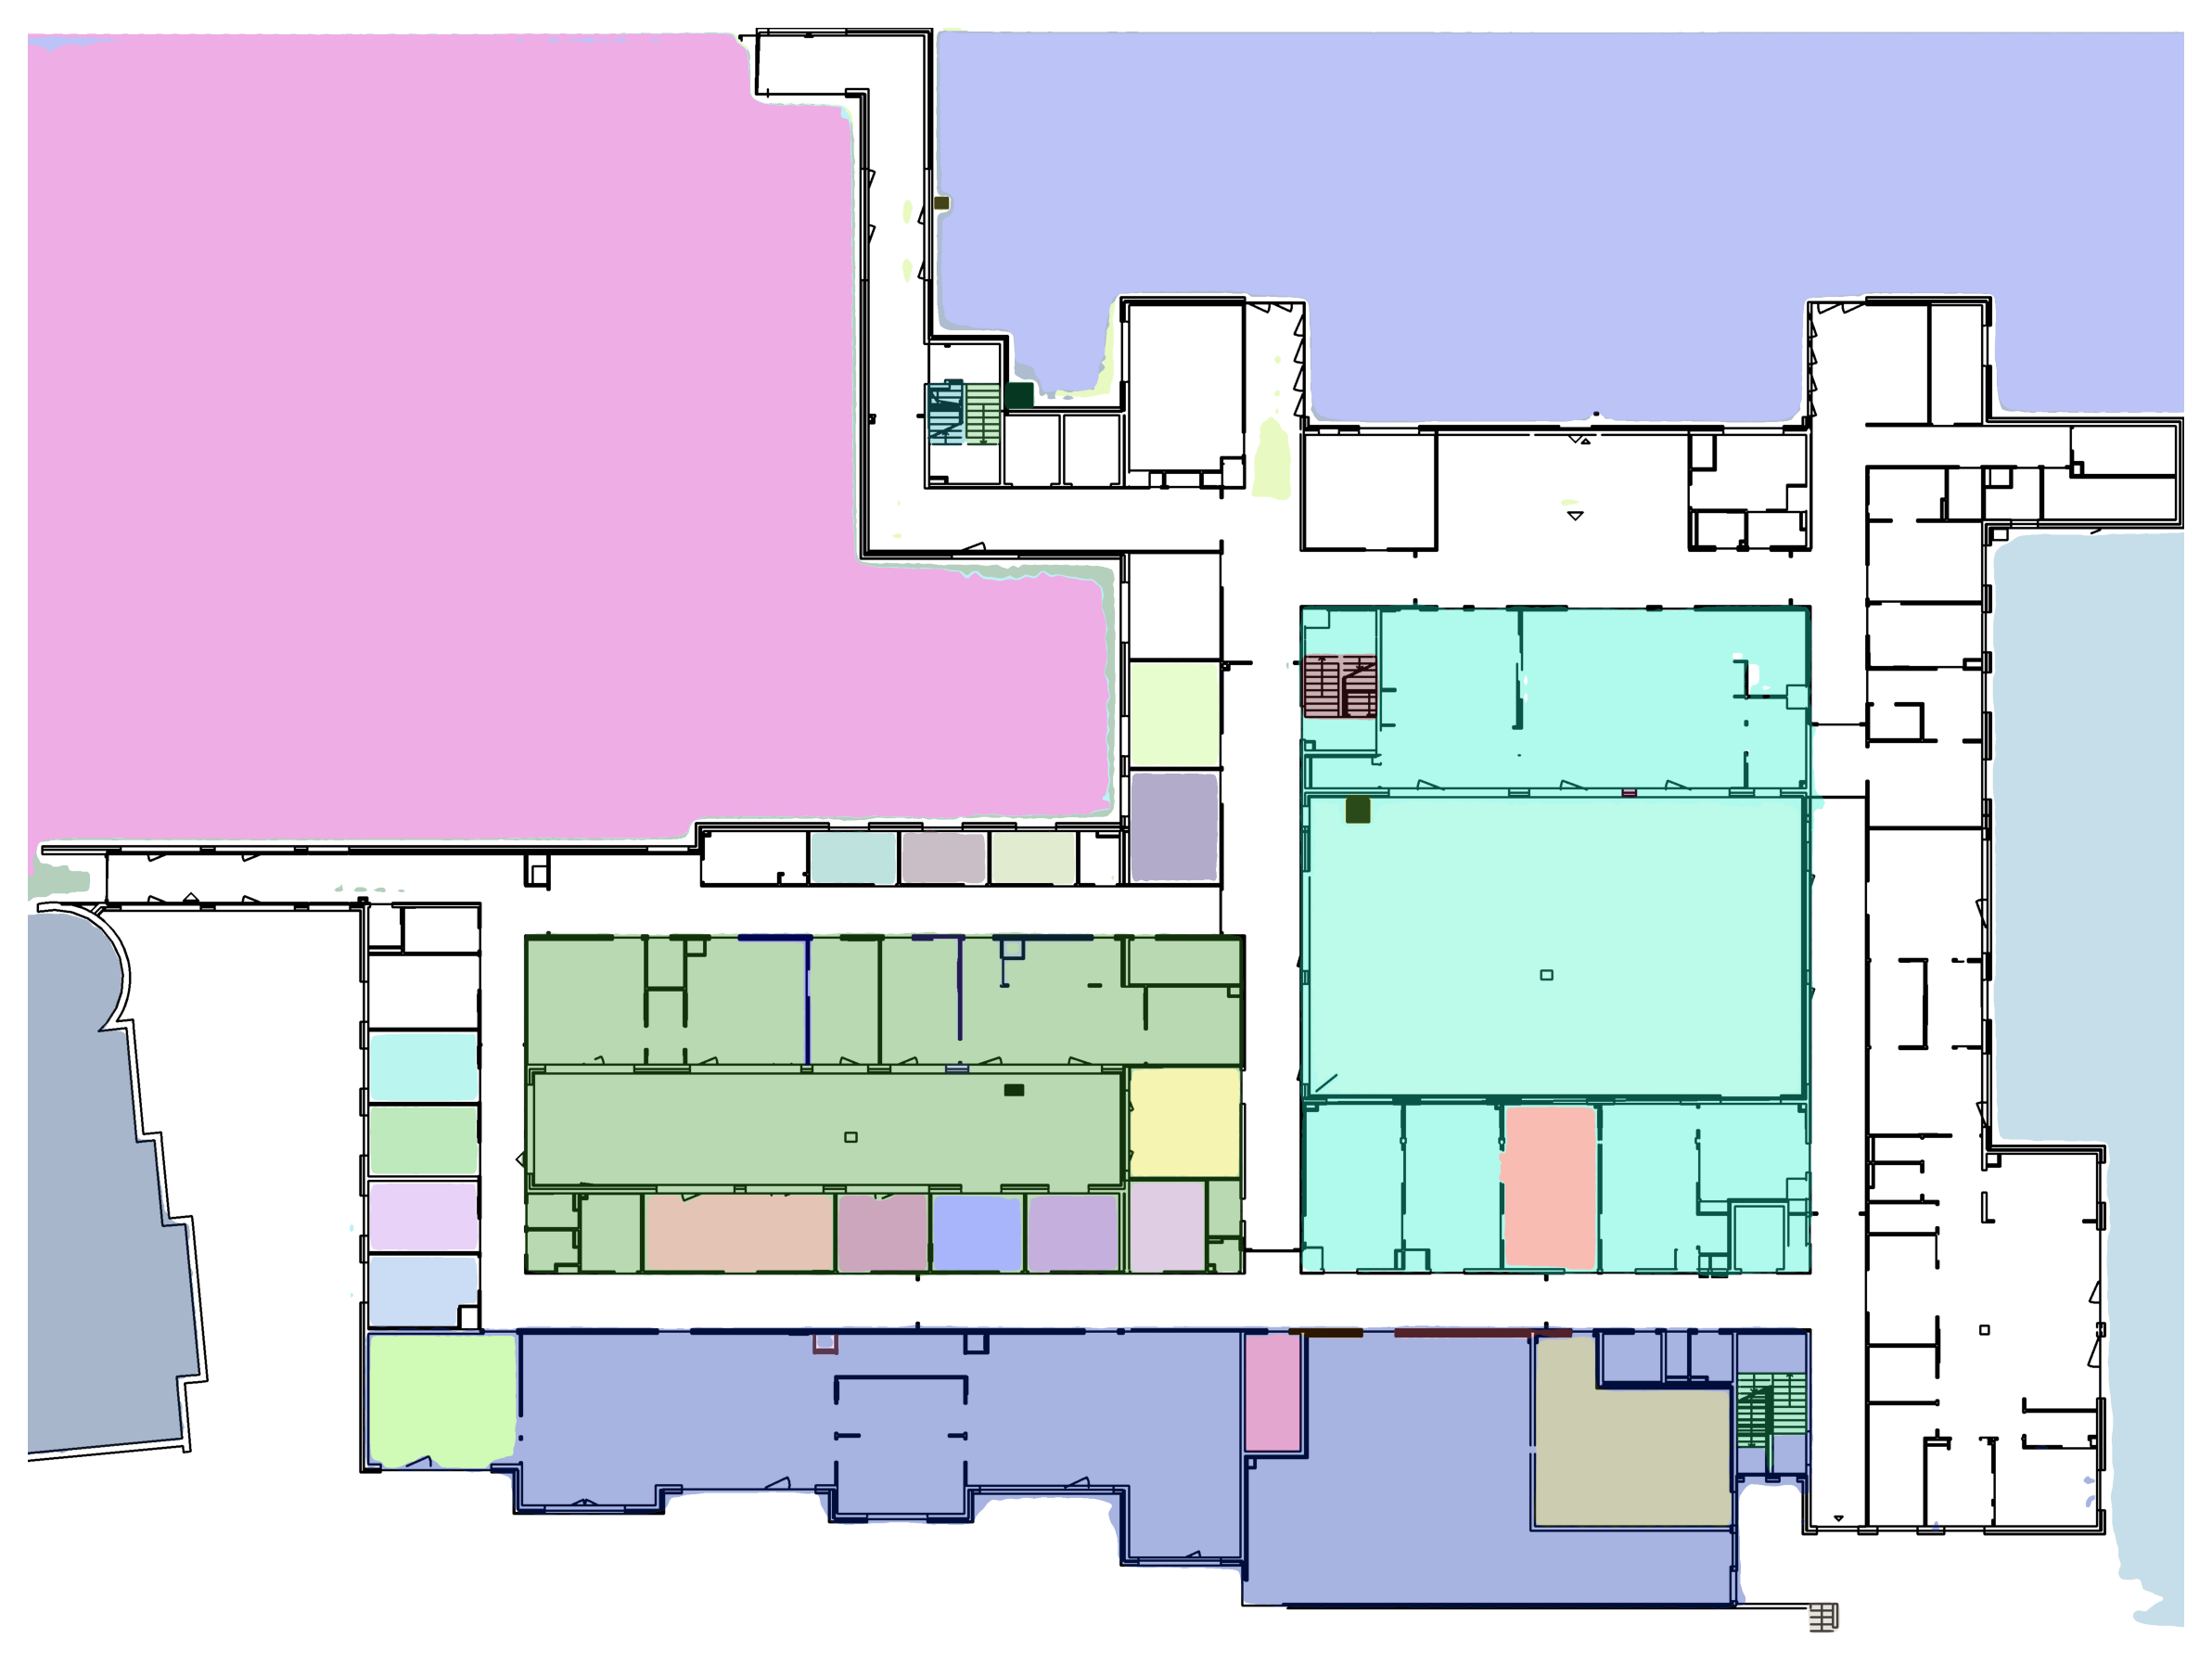

In [7]:
# Not a function
print("Extracting SAM masks...")
masks = get_sam_masks(image, sam)
print("Total segmentation masks:", len(masks))

# Not a function
plt.figure(figsize=(10,10), dpi=300)
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [8]:
def inference(image_path):
    image_ = load_image(image_path)
    image_ = np.array(image_)
    masks_ = get_sam_masks(image_, sam)
    # to get the masks
    # masks_ is a list of dict with keys segmentation etc....
    # see here https://github.com/facebookresearch/segment-anything/tree/main
    # take the first mask do:
    # masks_[0]['segmentation']
    plt.figure(figsize=(10,10), dpi=300)
    plt.imshow(image_)
    show_anns(masks_)
    plt.axis('off')
    plt.show()

Initiating SAM mask generator...
Predicting masks...


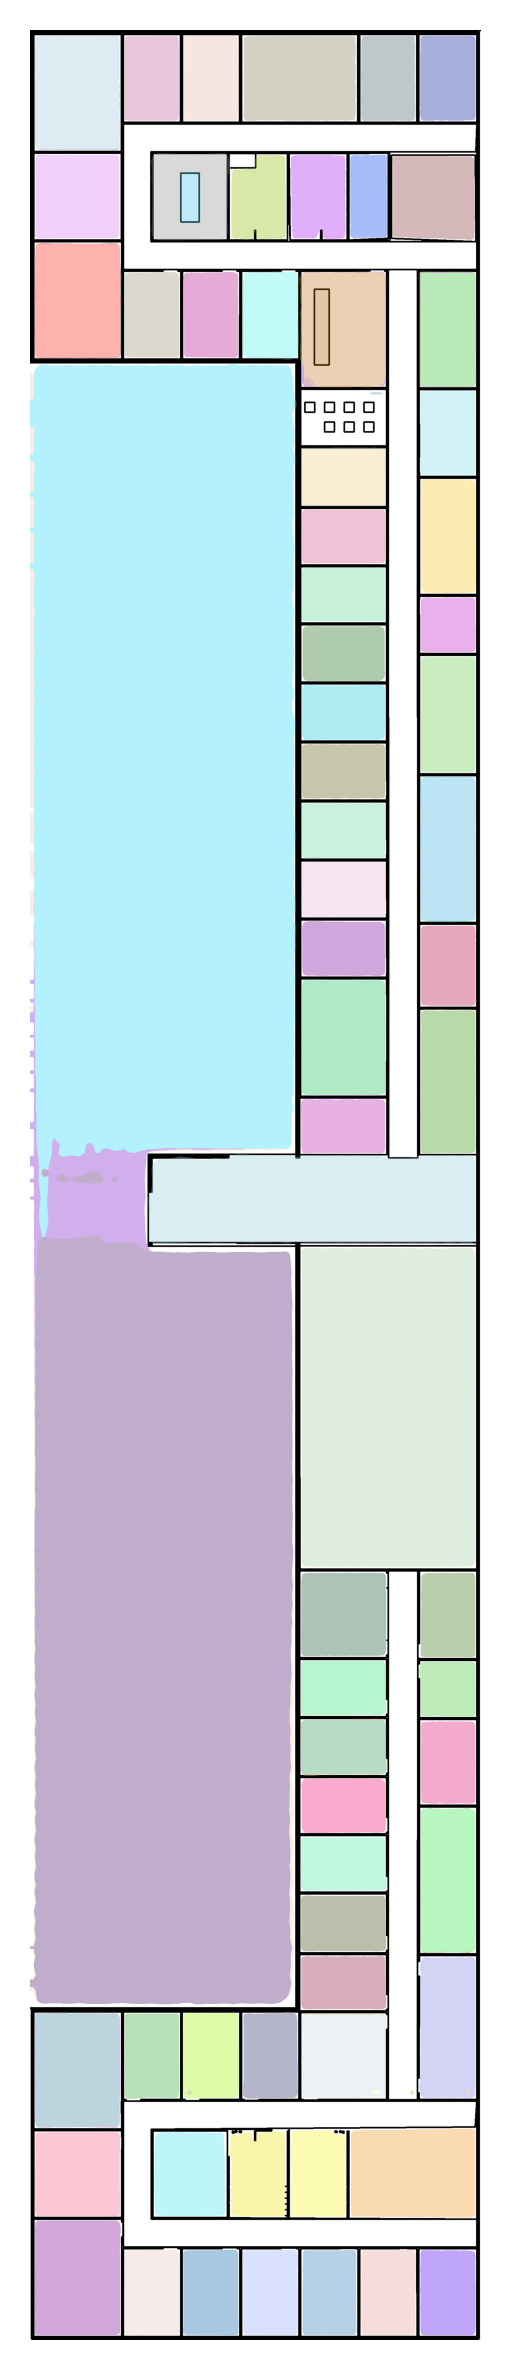

Initiating SAM mask generator...
Predicting masks...


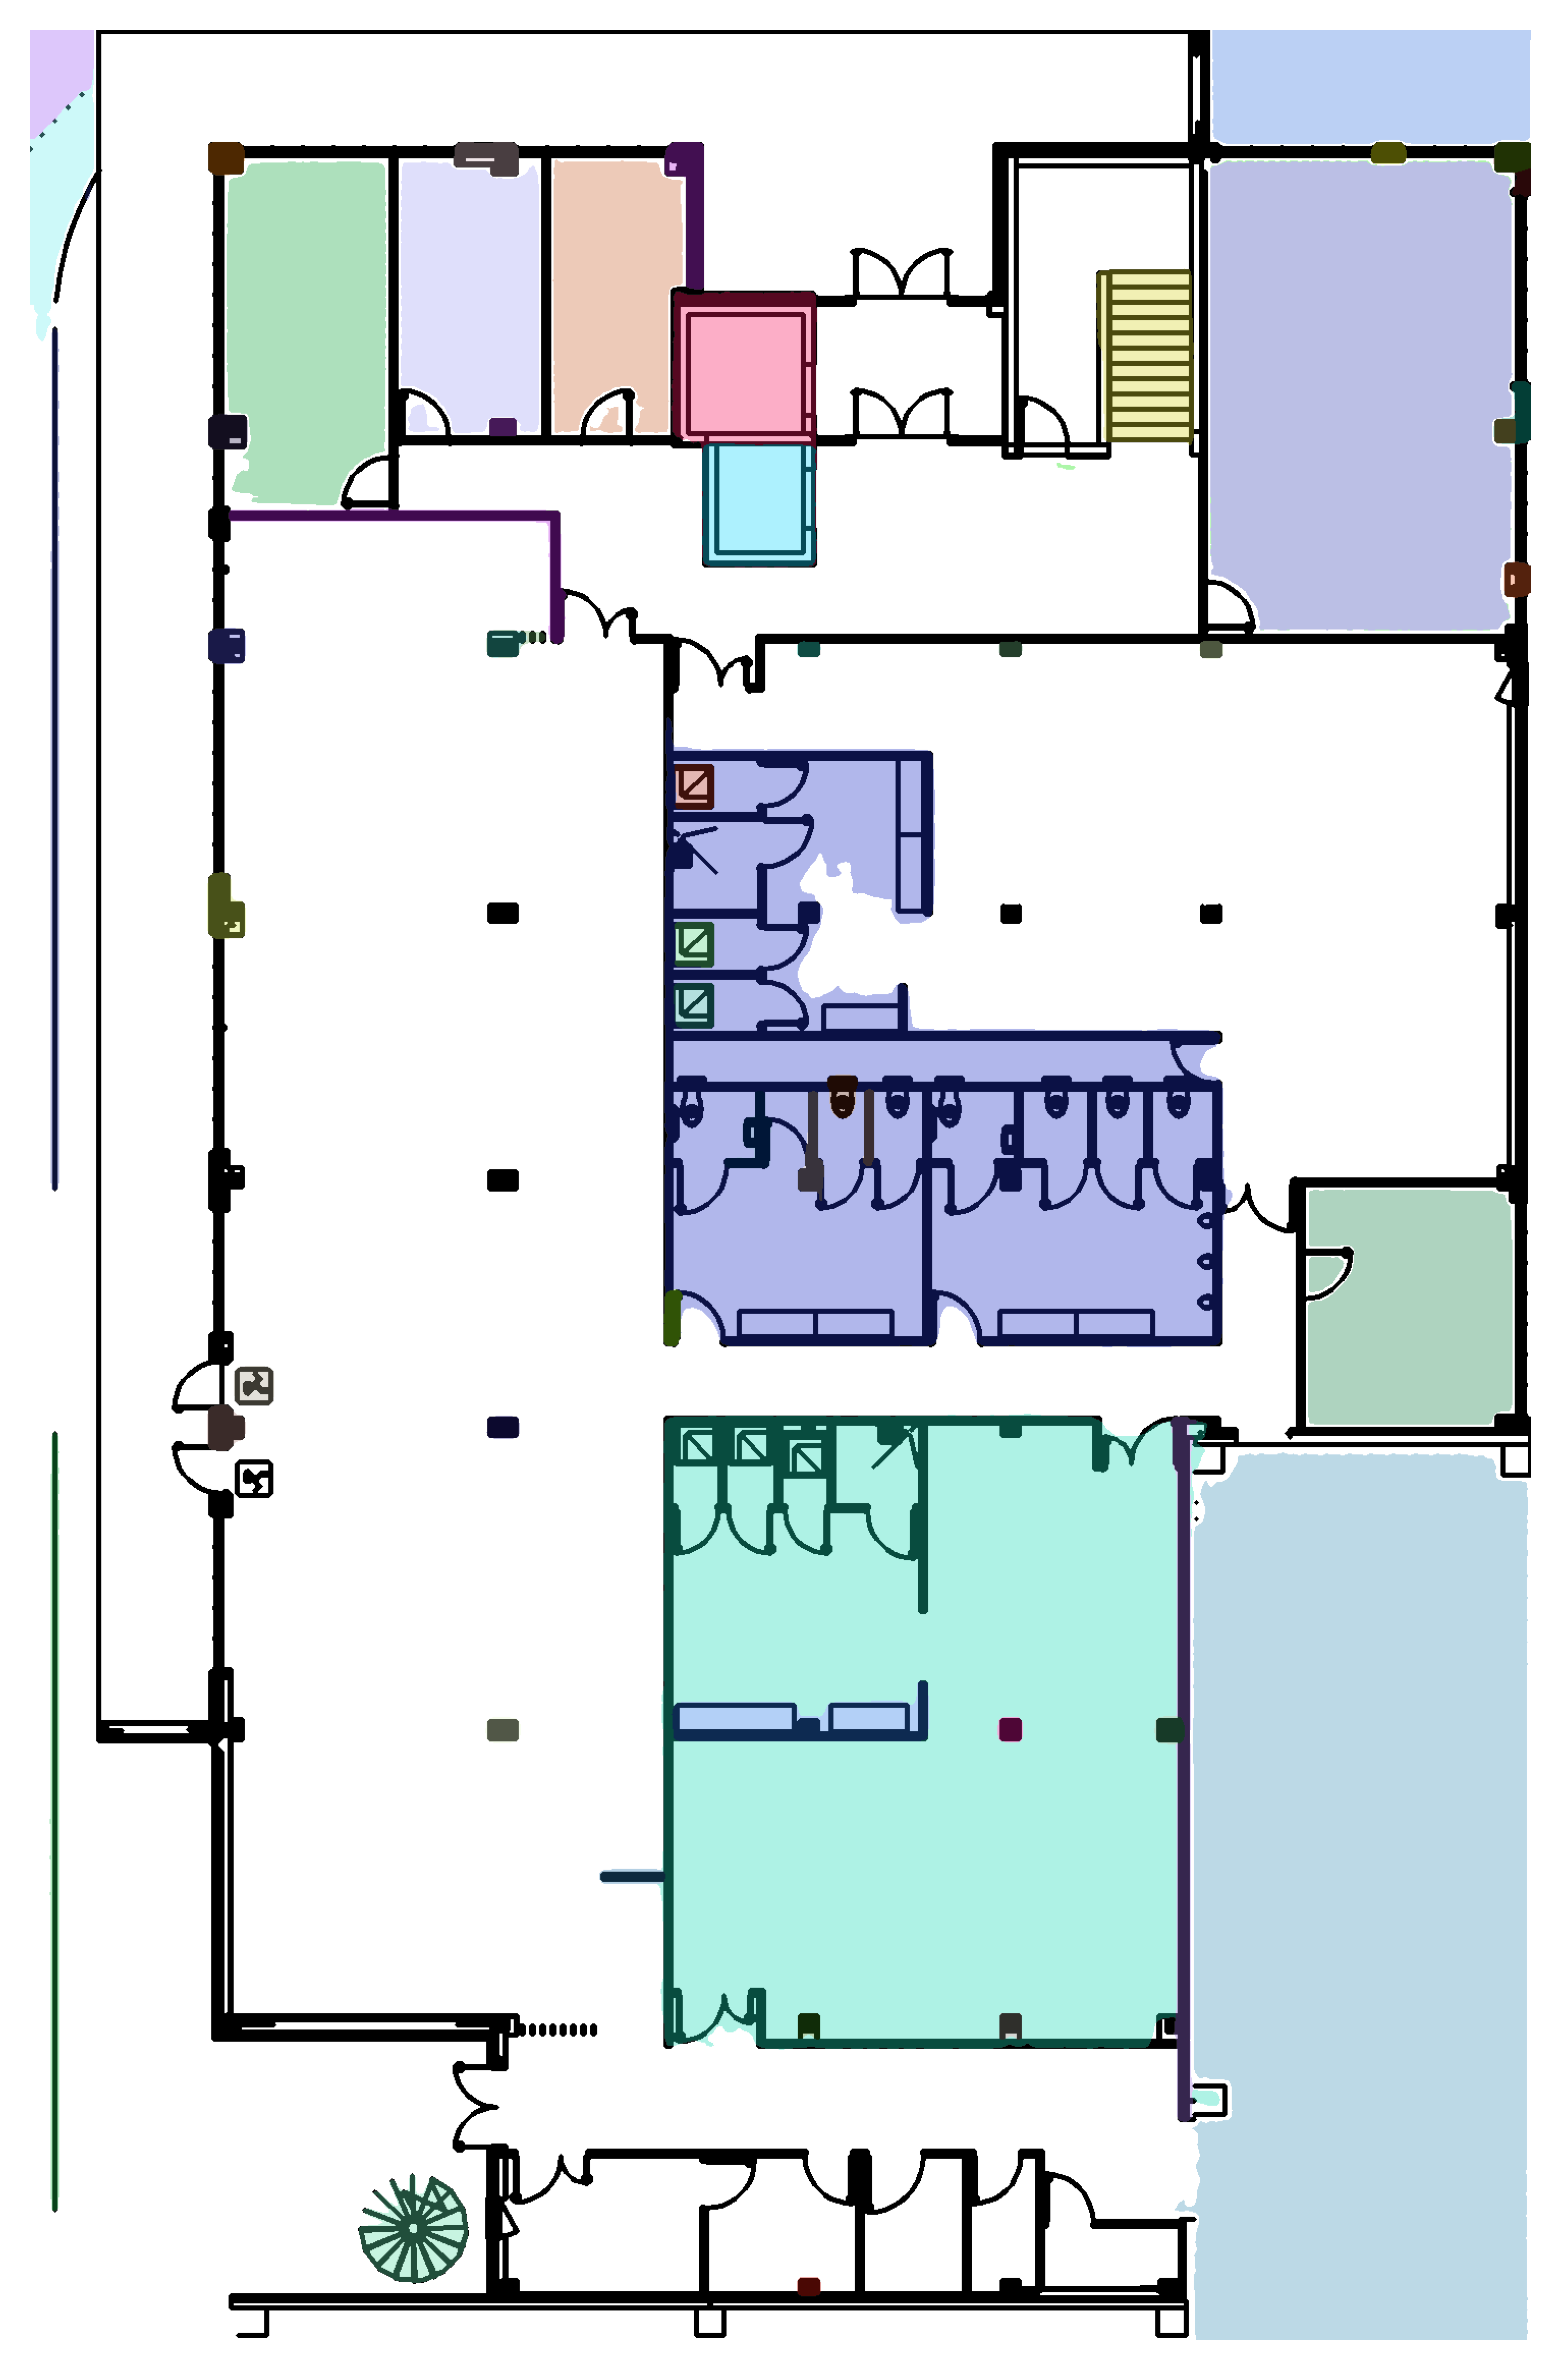

Initiating SAM mask generator...
Predicting masks...


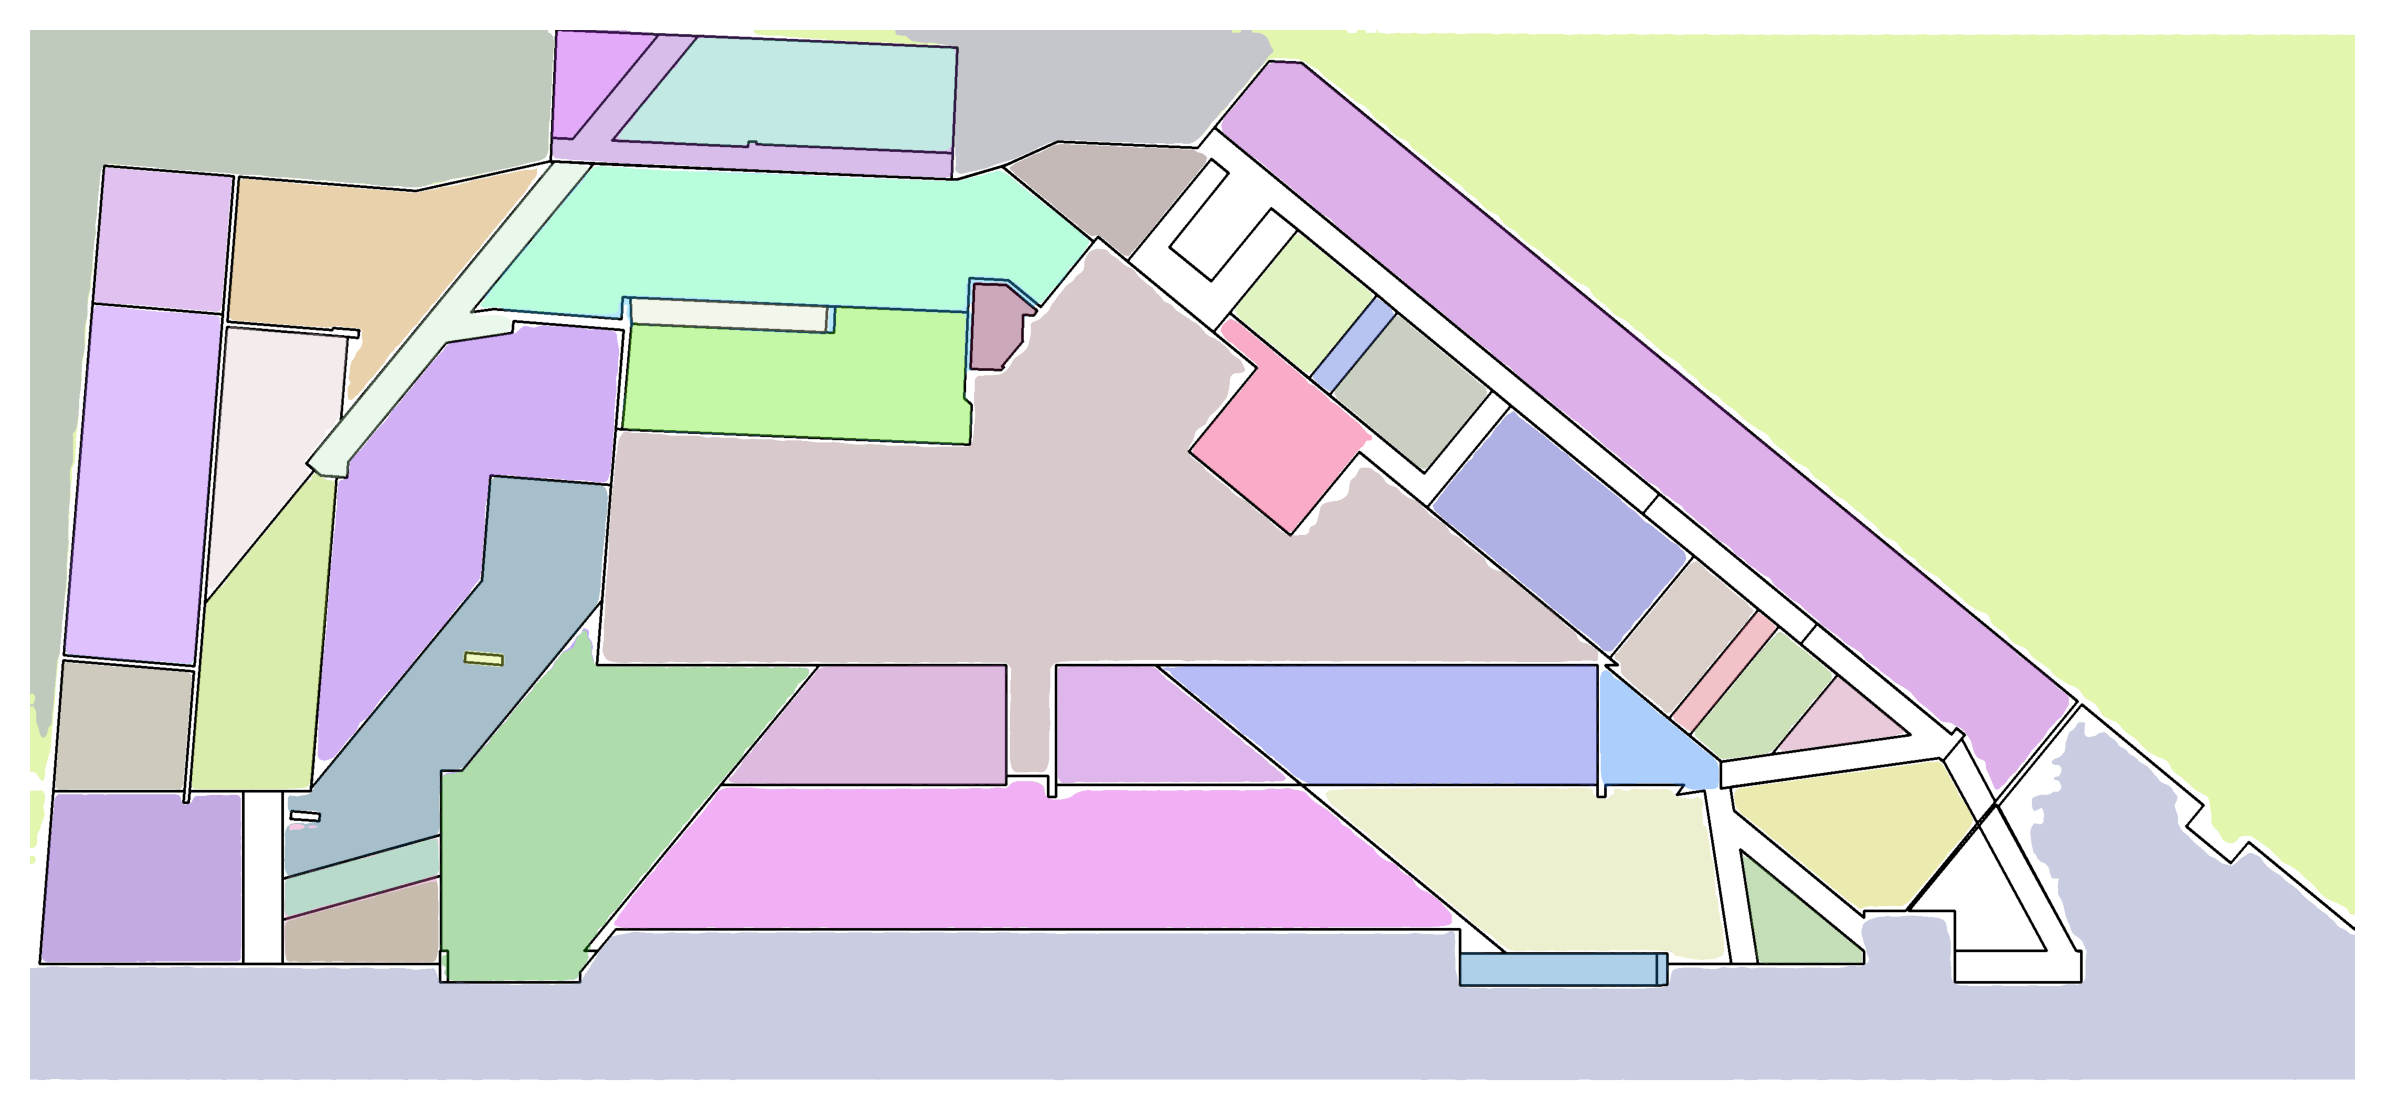

Initiating SAM mask generator...
Predicting masks...


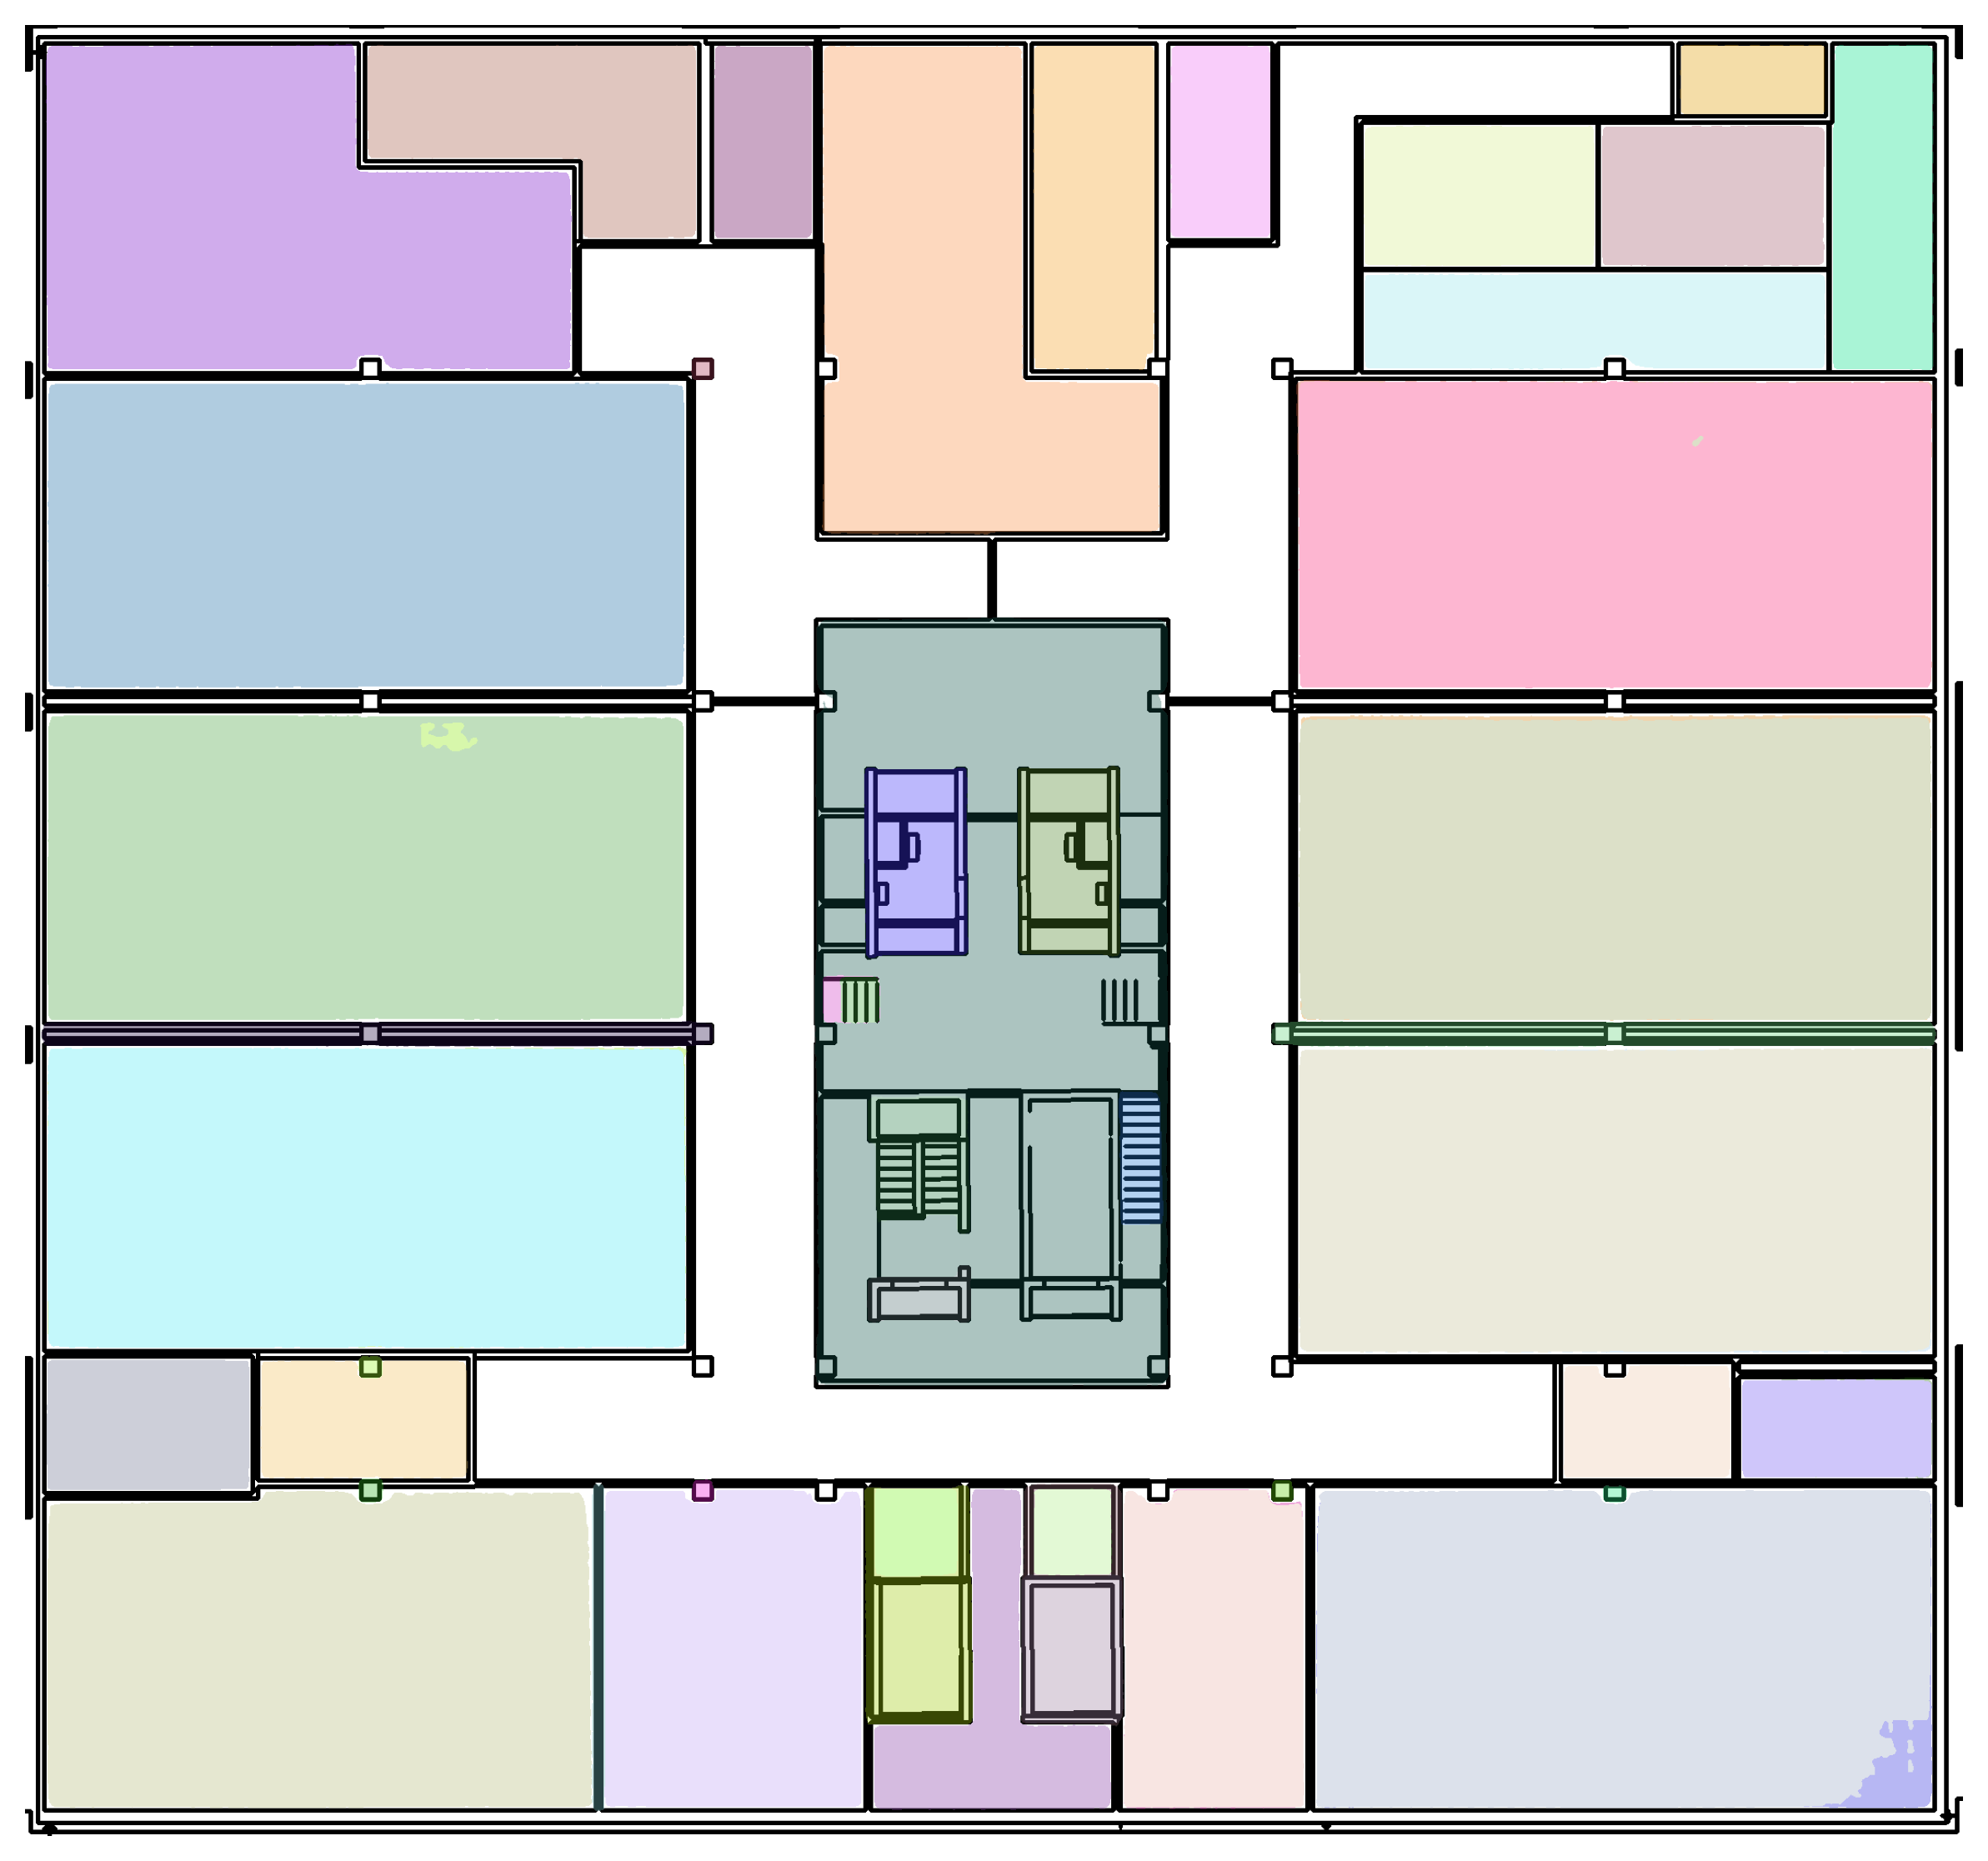

Initiating SAM mask generator...
Predicting masks...


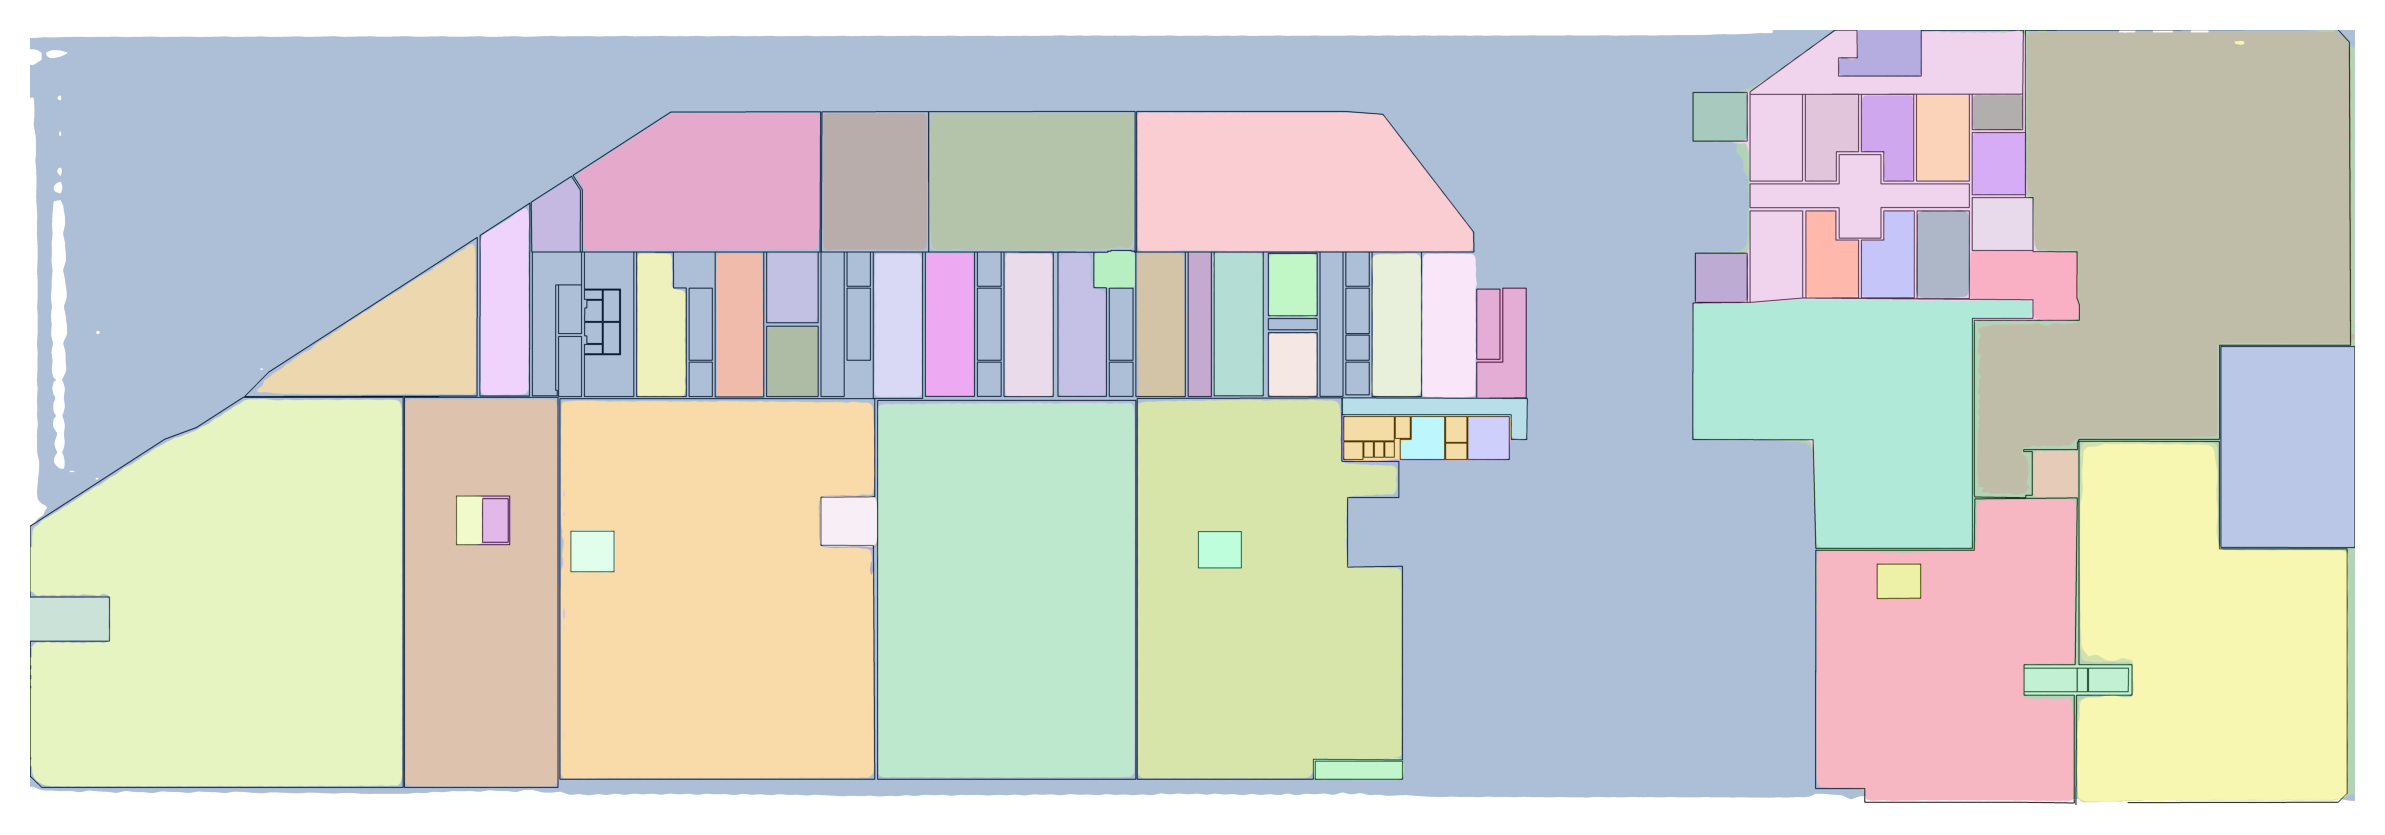

Initiating SAM mask generator...
Predicting masks...


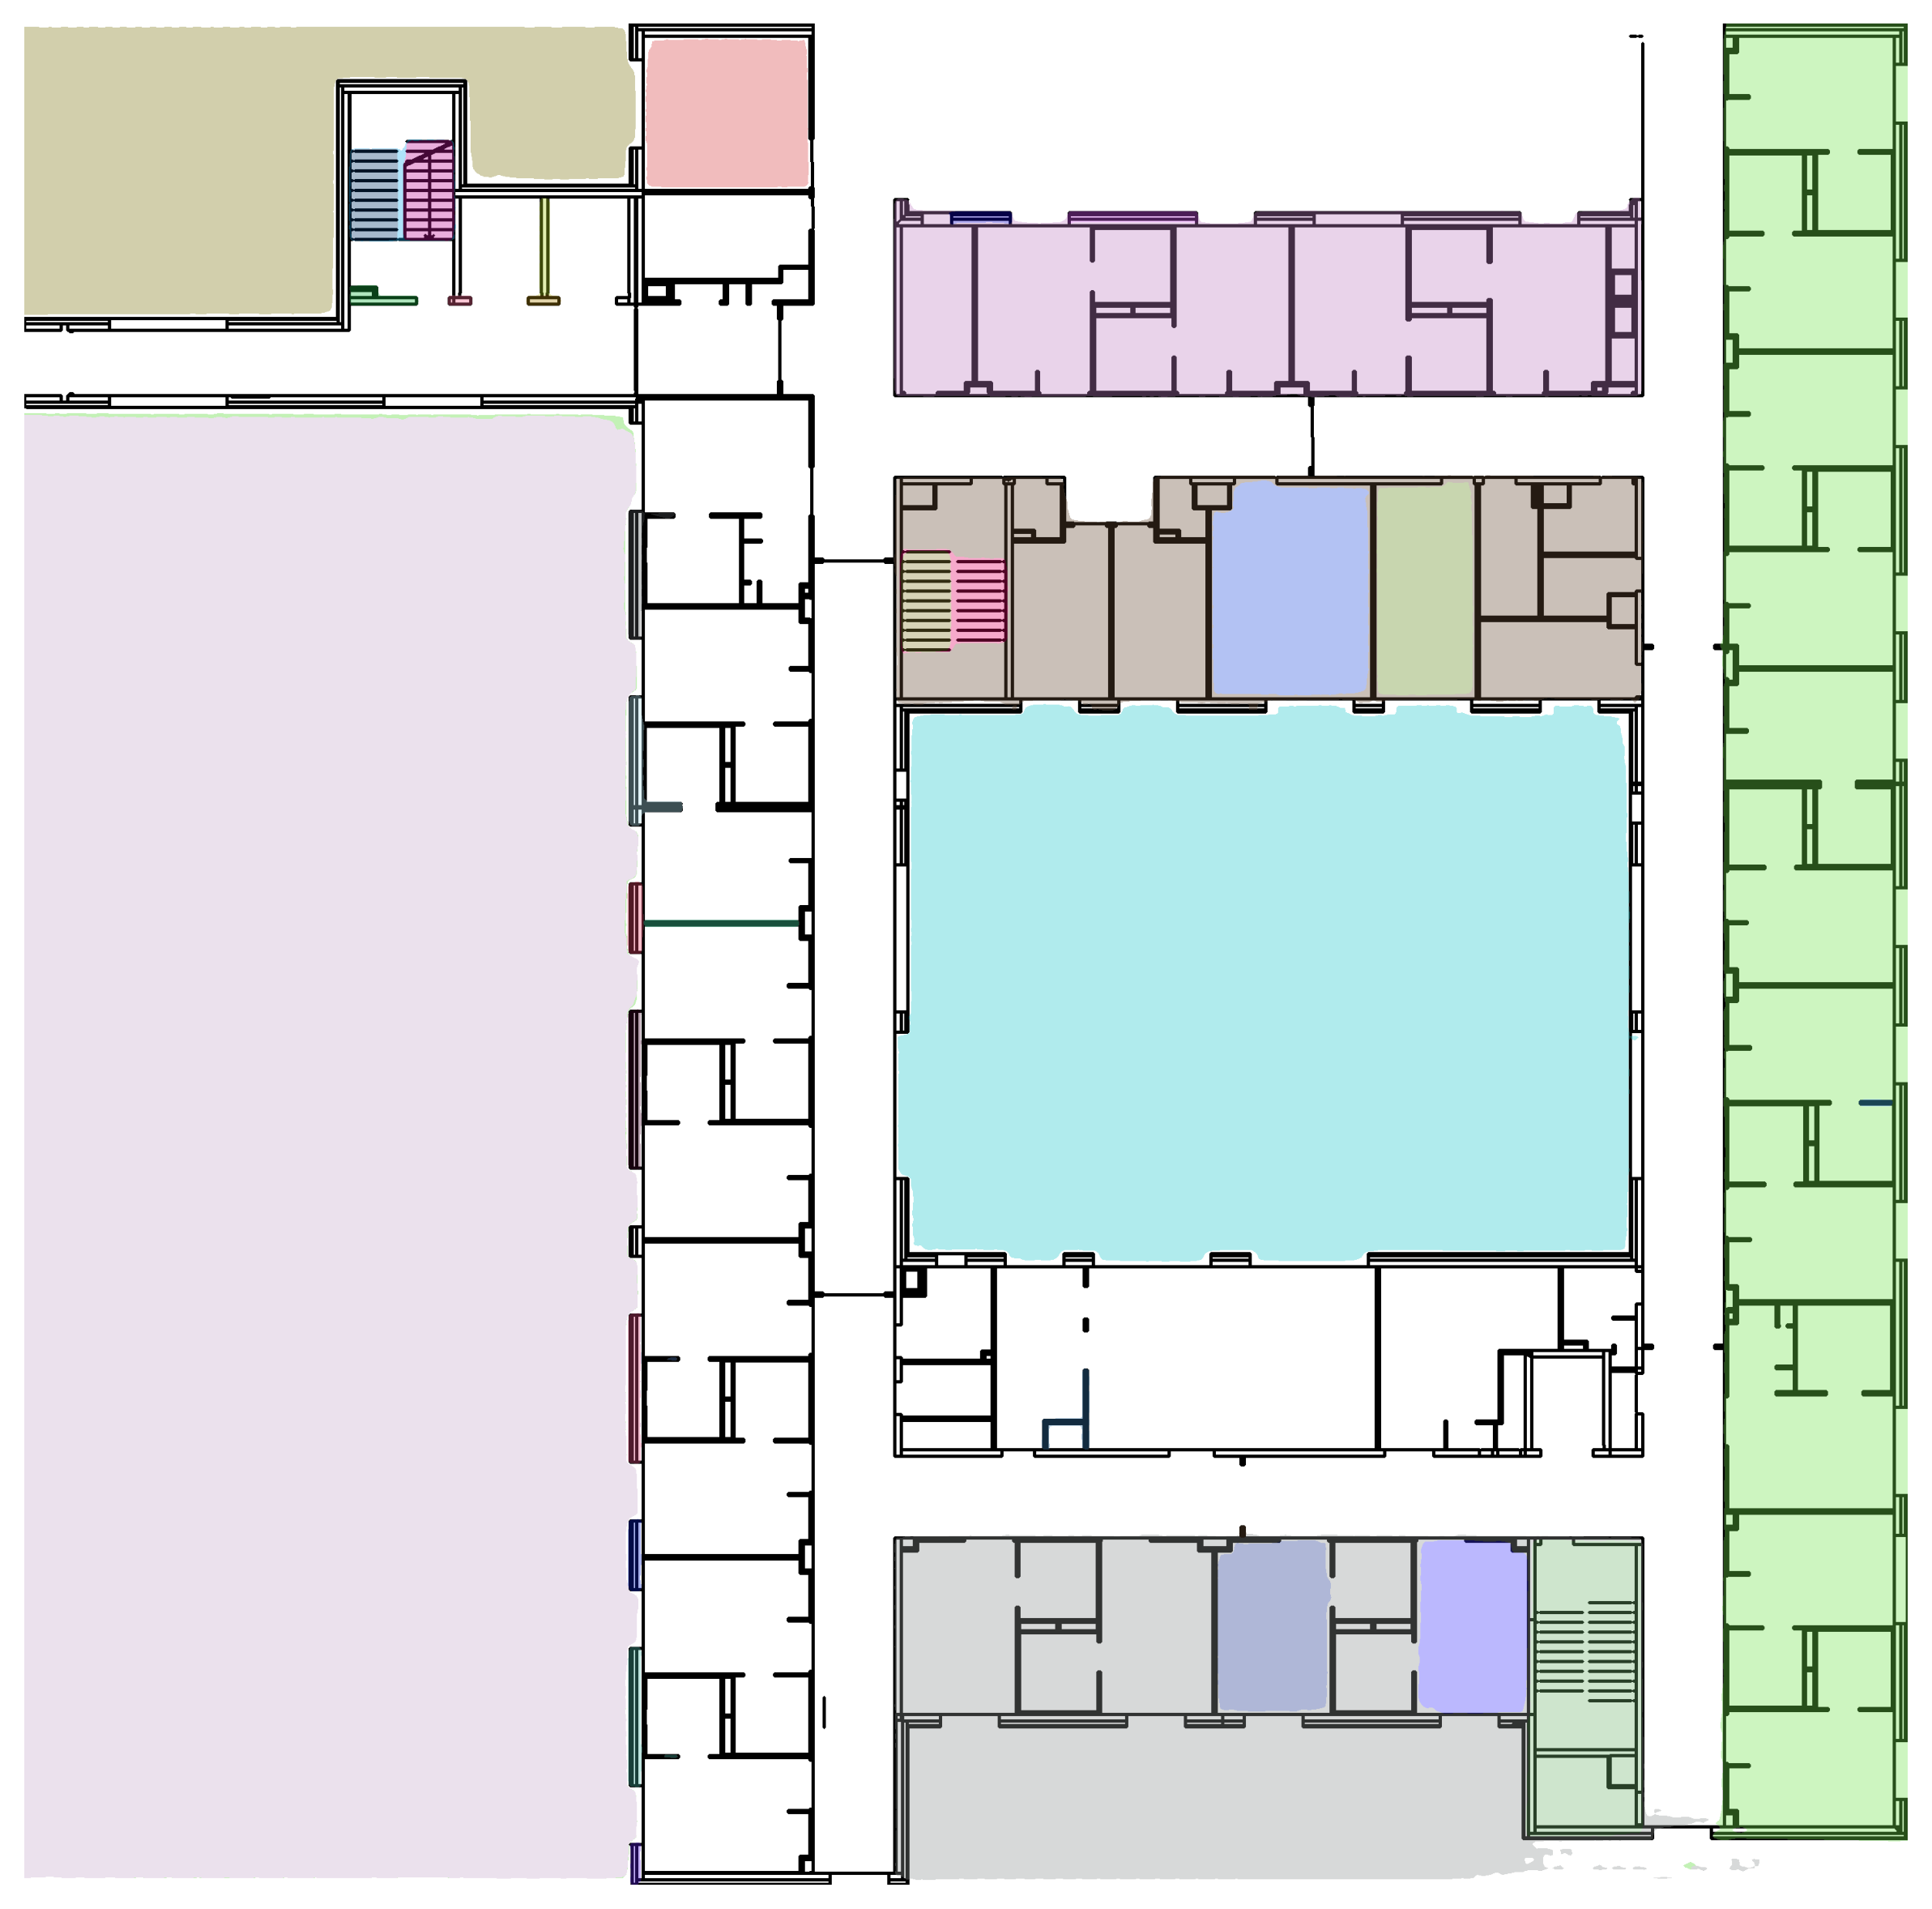

Initiating SAM mask generator...
Predicting masks...


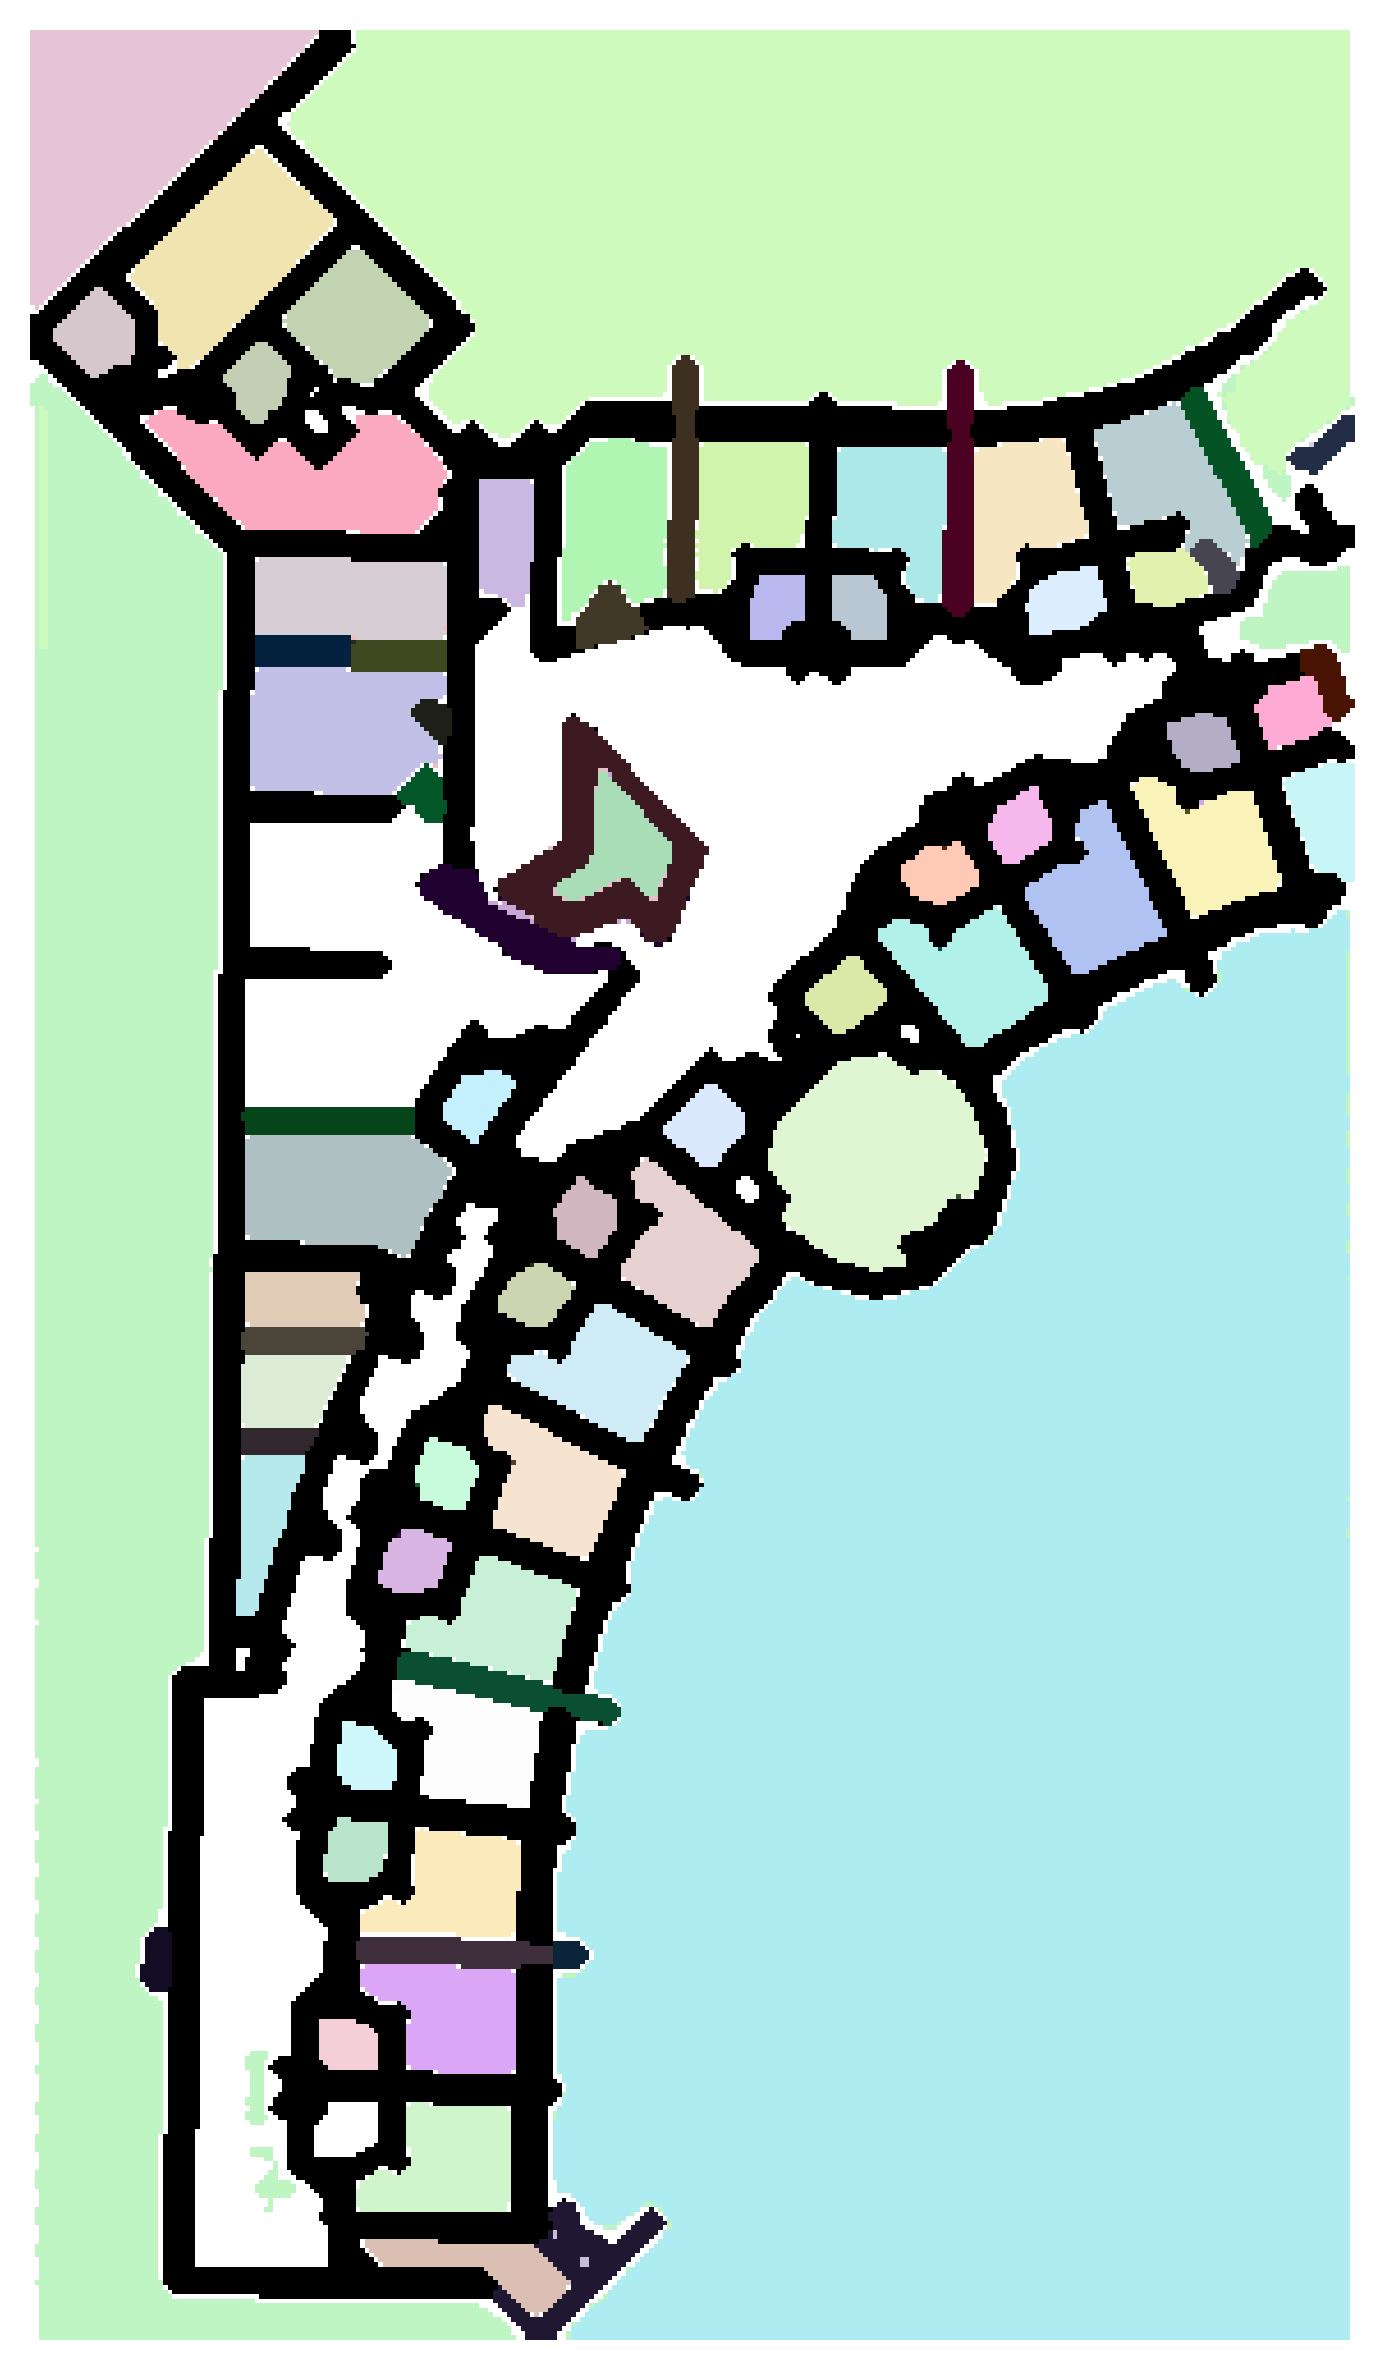

Initiating SAM mask generator...
Predicting masks...


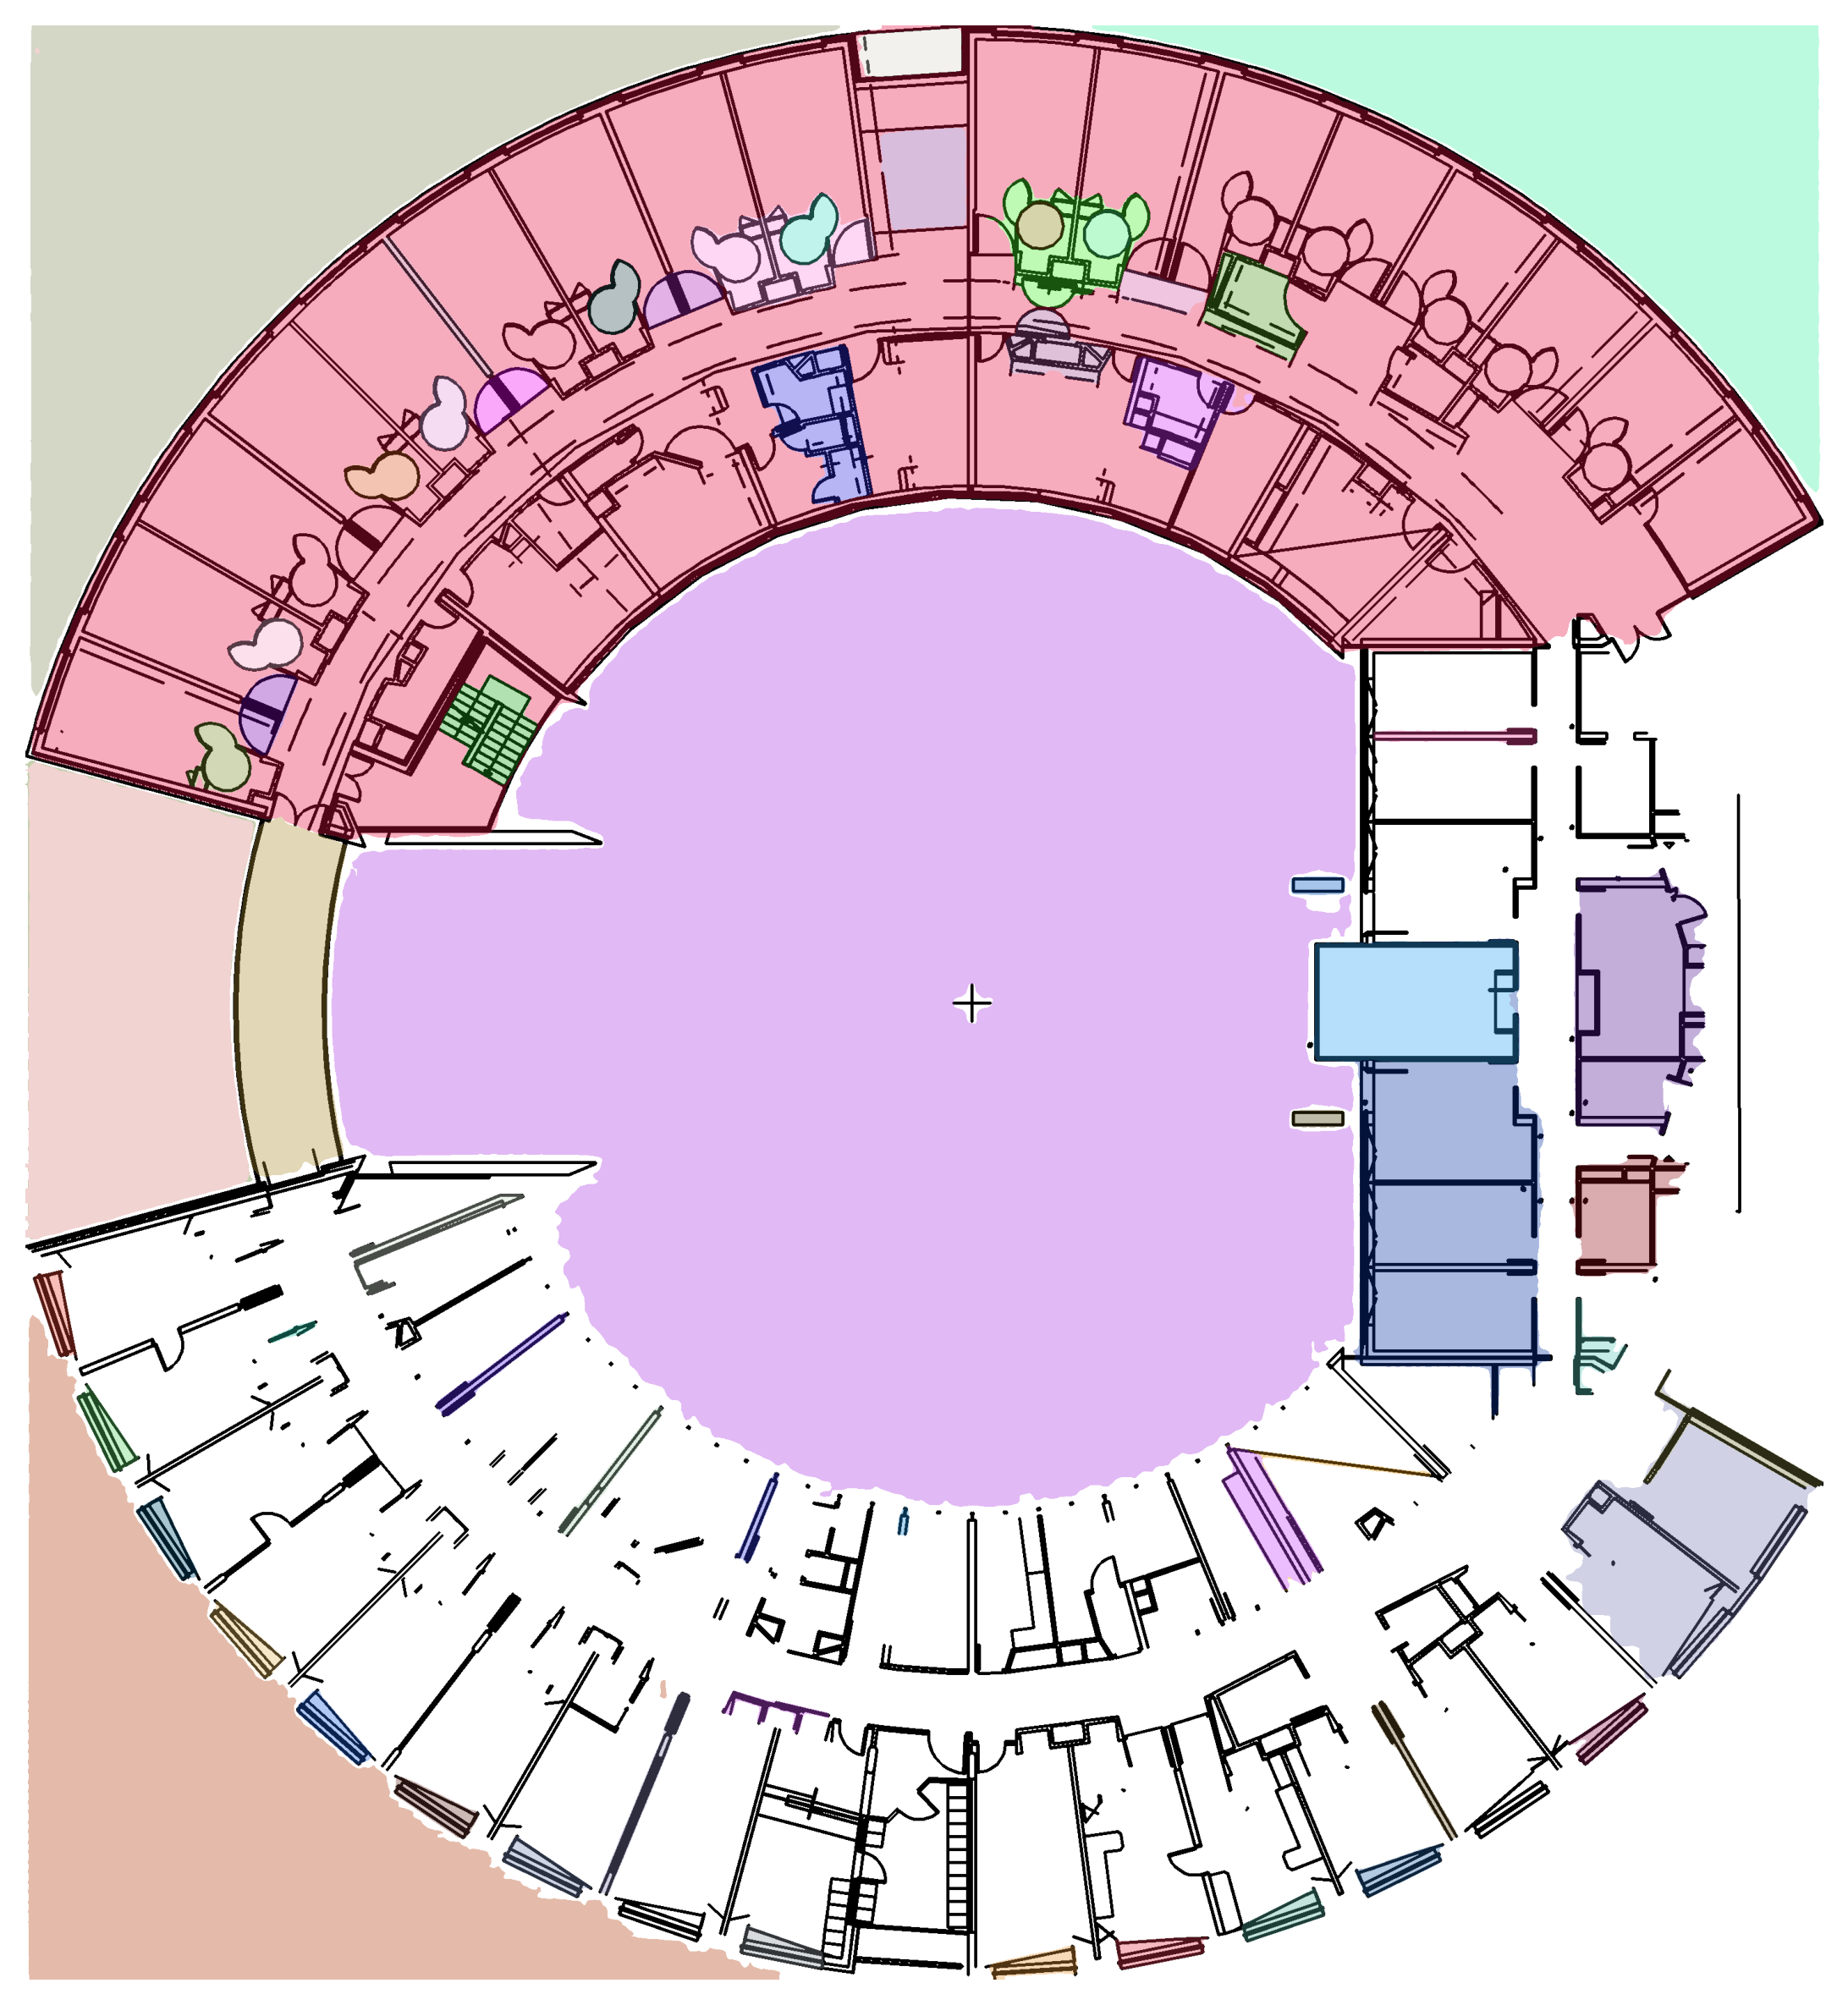

In [ ]:
for image_path in [f"test_images/samples/Output{i}_binary_image.png" for i in range(1, 9)]:
    inference(image_path)

In [10]:
# we will look to the masks contours on the first image
def get_contours(mask):
    mask = mask.astype(np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def plot_contours(image, contours):
    fig, ax = plt.subplots()
    ax.imshow(image)
    for contour in contours:
        contour = np.squeeze(contour)
        ax.plot(contour[:, 0], contour[:, 1], color='r')
    plt.show()

In [11]:
masks[1]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 72856,
 'bbox': [3303.0, 2423.0, 216.0, 365.0],
 'predicted_iou': 0.9642624855041504,
 'point_coords': [[3417.875, 2627.46875]],
 'stability_score': 0.965804934501648,
 'crop_box': [1805, 1190, 3036, 2421]}

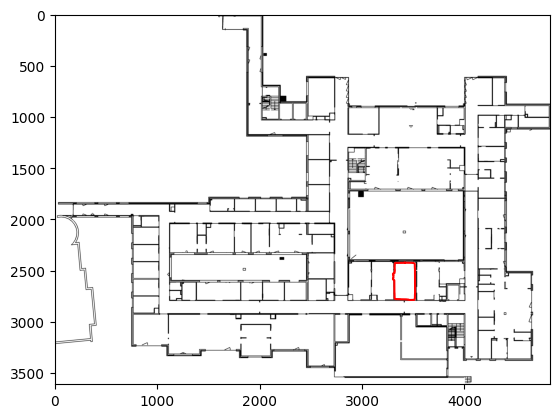

In [12]:
contours = get_contours(masks[1]['segmentation'])
plot_contours(image, contours)

Initiating SAM mask generator...
Predicting masks...


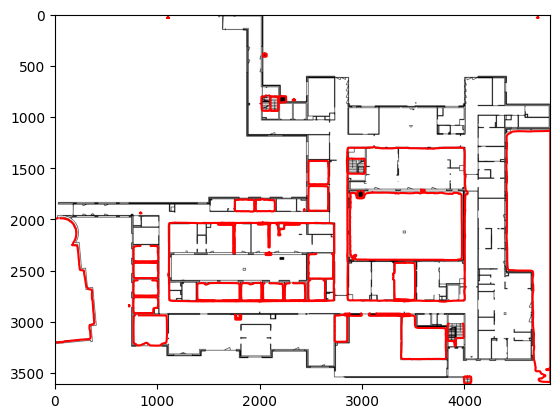

Initiating SAM mask generator...
Predicting masks...


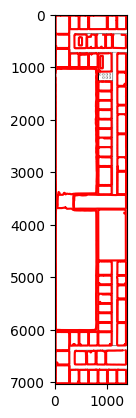

Initiating SAM mask generator...
Predicting masks...


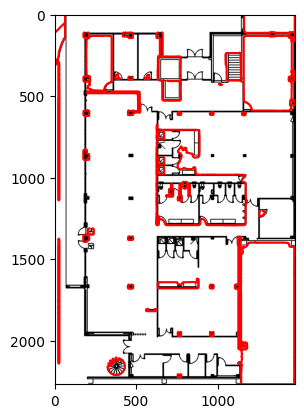

Initiating SAM mask generator...
Predicting masks...


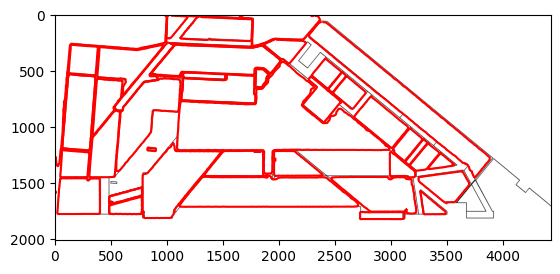

Initiating SAM mask generator...
Predicting masks...


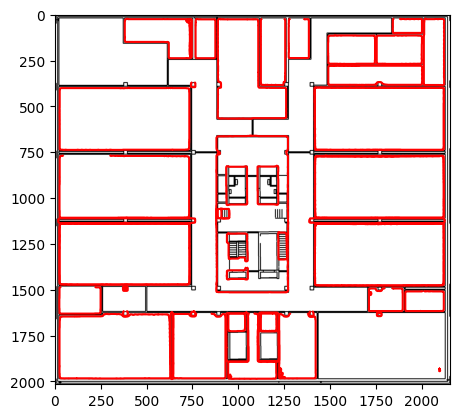

Initiating SAM mask generator...
Predicting masks...


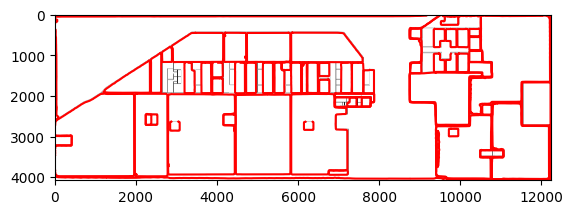

Initiating SAM mask generator...
Predicting masks...


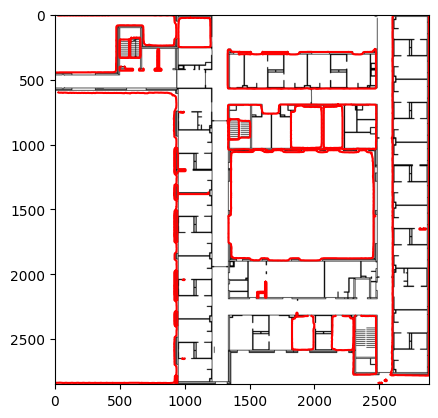

Initiating SAM mask generator...
Predicting masks...


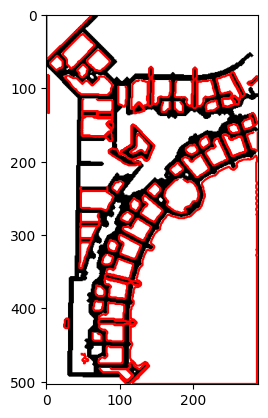

Initiating SAM mask generator...
Predicting masks...


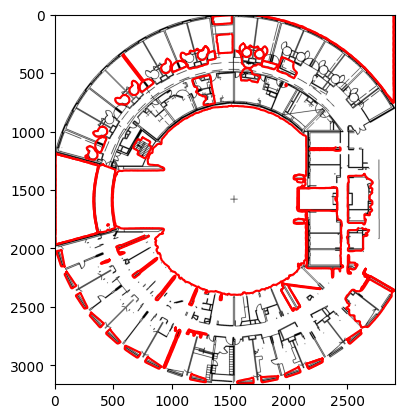

In [ ]:
import pickle

for i, image_path in enumerate([f"test_images/samples/Output{l}_binary_image.png" for l in range(0, 9)]):
    image_ = load_image(image_path)
    image_ = np.array(image_)
    masks_ = get_sam_masks(image_, sam)
    # now let save these masks
    # with open(f"Output{i}_masks.pkl", "wb") as f:
    #     pickle.dump(masks_, f)
    contours = []
    for j in range(len(masks_)):
        contour = get_contours(masks_[j]['segmentation'])
        contours.append(contour[0])
    # save also the contours
    np.savez(f"masks_contours/Output{i}_masks_contours.npz", *contours)
    plot_contours(image_, contours)

In [ ]:
# I've use the binary image from fabien branches so to make the conversion back to geojson take the transform parameters there